In [1]:
# 1)PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [3]:
forest = pd.read_csv("forestfires.csv")
df1=forest.copy()
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df1.drop(["month","day"],axis=1,inplace = True)
df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


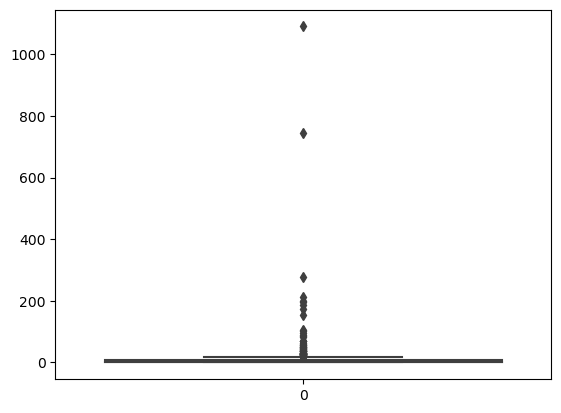

In [7]:
ax = sns.boxplot(df1['area'])

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


C:\Users\abhis\AppData\Local\Temp\ipykernel_10204\3081492348.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['area'],shade=True,color='g')


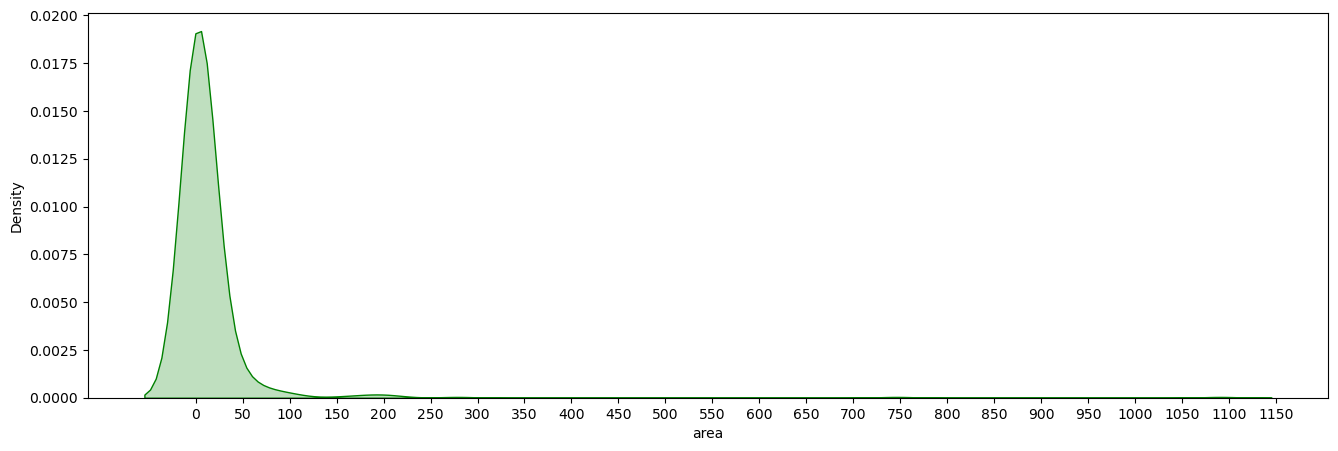

In [8]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [9]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    forest[col].plot.box()
plt.tight_layout() 
plt.show()corr = df1[df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
num_data = forest[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

SyntaxError: invalid syntax (2349517877.py, line 9)

<Axes: >

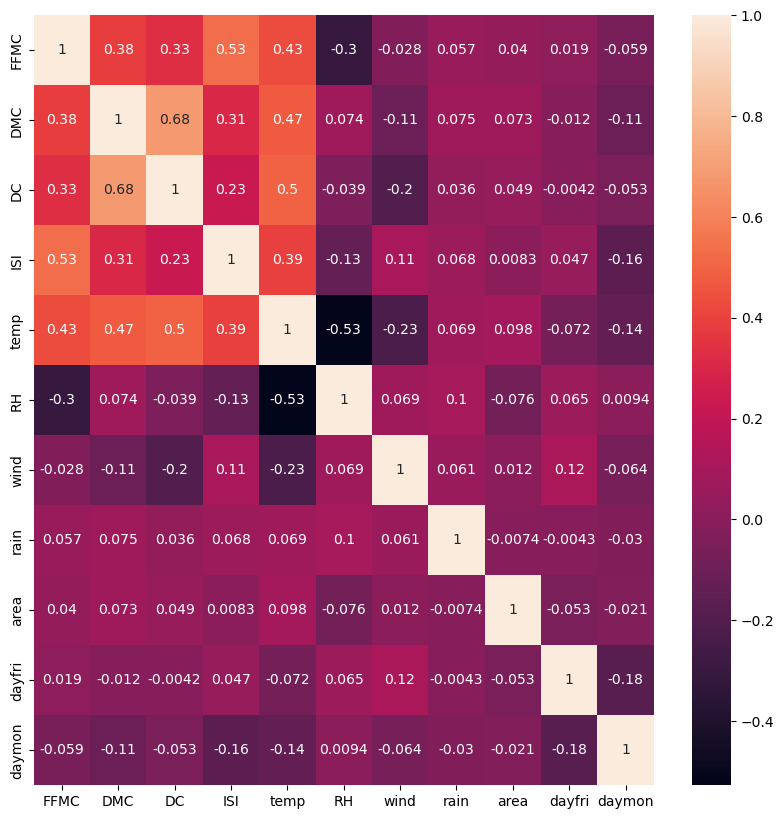

In [10]:
corr = df1[df1.columns[0:11]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Neural Network Model

In [11]:
mapping = {'small': 1, 'large': 2}
df1 = df1.replace(mapping)
X = np.array(df1.iloc[:,0:28])
y = np.array(df1.iloc[:,28])

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
X_norm = norm_func(X)
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [14]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 2s 3ms/step - loss: 0.4241 - accuracy: 0.7312
Epoch 2/150
42/42 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 3ms/step - loss: -0.3237 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 3ms/step - loss: -0.7400 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 3ms/step - loss: -1.1669 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 3ms/step - loss: -1.6978 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 3ms/step - loss: -2.4133 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 3ms/step - loss: -3.3660 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 3ms/step - loss: -4.6477 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 3ms/step - loss: -6.3162 - accuracy: 0.7312
E

In [18]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 1s 3ms/step - loss: -10956.4863 - accuracy: 0.7312
Accuracy: 73.12


In [ ]:
# 2) predicting turbine energy yield (TEY) using ambient variables as features.

In [19]:
#!pip install tensorflow

In [20]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy

In [21]:
gas = pd.read_csv("gas_turbines.csv")

In [22]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [23]:
X = gas.iloc[:,0:10]
Y = gas.iloc[:,10]
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494


In [24]:
gas.T

,0,1,2,3,4,5,6,7,8,9,...,15029,15030,15031,15032,15033,15034,15035,15036,15037,15038
AT,6.8594,6.7850,6.8977,7.0569,7.3978,7.6998,7.7901,7.7139,7.7975,8.0820,...,10.4540,10.3050,10.2380,10.3470,10.1550,9.0301,7.8879,7.2647,7.0060,6.9279
AP,1007.9000,1008.4000,1008.8000,1009.2000,1009.7000,1010.7000,1011.6000,1012.7000,1013.8000,1015.0000,...,1004.5000,1004.6000,1004.6000,1004.9000,1005.1000,1005.6000,1005.9000,1006.3000,1006.8000,1007.2000
AH,96.7990,97.1180,95.9390,95.2490,95.1500,92.7080,91.9830,91.3480,90.1960,88.5970,...,98.3880,99.2820,99.9950,100.1700,99.9850,98.4600,99.0930,99.4960,99.0080,97.5330
AFDP,3.5000,3.4998,3.4824,3.4805,3.4976,3.5236,3.5298,3.5088,3.5141,4.0612,...,3.5555,3.5339,3.8805,4.3198,3.7043,3.5421,3.5059,3.4770,3.4486,3.4275
GTEP,19.6630,19.7280,19.7790,19.7920,19.7650,19.6830,19.6590,19.6730,19.6340,23.4060,...,18.9370,18.9090,21.2060,24.0480,19.8370,19.1640,19.4140,19.5300,19.3770,19.3060
TIT,1059.2000,1059.3000,1059.4000,1059.6000,1059.7000,1059.8000,1060.0000,1059.8000,1060.1000,1083.0000,...,1053.4000,1053.3000,1067.5000,1084.3000,1059.7000,1049.7000,1046.3000,1037.7000,1043.2000,1049.9000
TAT,550.0000,550.0000,549.8700,549.9900,549.9800,549.9700,549.8700,549.9200,550.0900,550.2100,...,550.0300,550.0000,550.3200,549.9800,549.9000,546.2100,543.2200,537.3200,541.2400,545.8500
TEY,114.7000,114.7200,114.7100,114.7200,114.7200,114.7200,114.7100,114.7100,114.7200,131.7000,...,110.7800,110.7800,121.2600,133.7400,115.5200,111.6100,111.7800,110.1900,110.7400,111.5800
CDP,10.6050,10.5980,10.6010,10.6060,10.6120,10.6260,10.6440,10.6560,10.6440,11.6790,...,10.3270,10.3280,11.0020,11.6850,10.5700,10.4000,10.4330,10.4830,10.5330,10.5830
CO,3.1547,3.2363,3.2012,3.1923,3.2484,3.4467,3.4874,3.6043,3.3943,1.9081,...,3.6133,3.7118,2.6790,1.3663,3.3792,4.5186,4.8470,7.9632,6.2494,4.9816


In [ ]:
#sns.set_style('darkgrid')
sns.pairplot(gas)
plt.show()

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

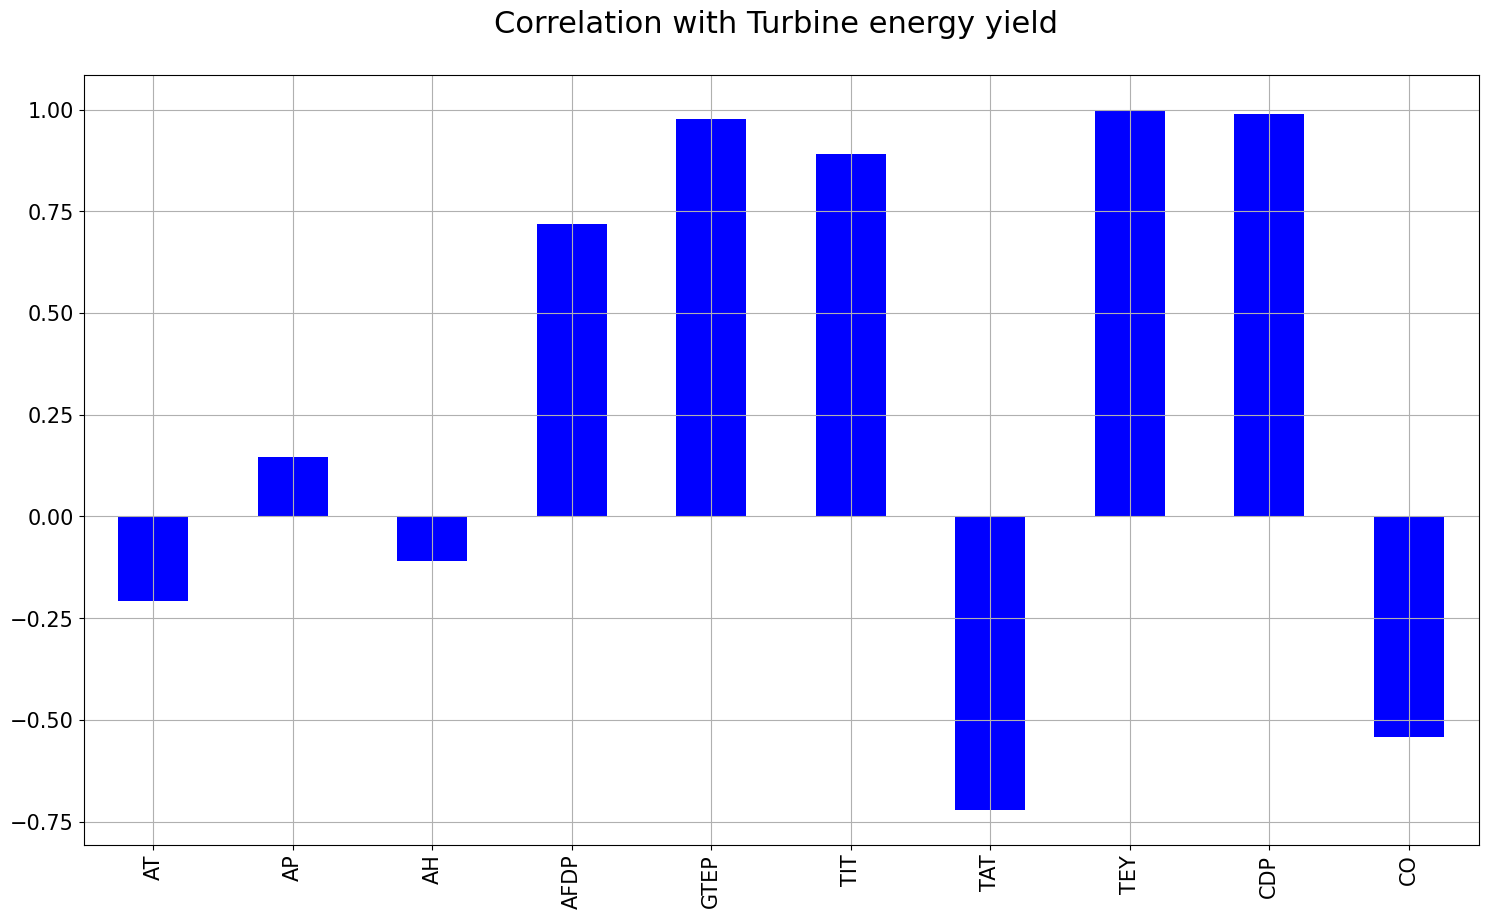

In [26]:
data2 = X.copy()

correlations = data2.corrwith(gas["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [27]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [28]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [29]:
X_norm = norm_func(X)

In [30]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_norm, Y, epochs=150, batch_size=10)

Epoch 1/150
1504/1504 [==============================] - 5s 3ms/step - loss: -106031.5781 - accuracy: 0.0000e+00
Epoch 2/150
1504/1504 [==============================] - 4s 2ms/step - loss: -1267918.6250 - accuracy: 0.0000e+00
Epoch 3/150
1504/1504 [==============================] - 4s 3ms/step - loss: -4583384.5000 - accuracy: 0.0000e+00
Epoch 4/150
1504/1504 [==============================] - 4s 2ms/step - loss: -10551484.0000 - accuracy: 0.0000e+00
Epoch 5/150
1504/1504 [==============================] - 4s 2ms/step - loss: -19559298.0000 - accuracy: 0.0000e+00
Epoch 6/150
1504/1504 [==============================] - 4s 2ms/step - loss: -32013048.0000 - accuracy: 0.0000e+00
Epoch 7/150
1504/1504 [==============================] - 4s 2ms/step - loss: -48328472.0000 - accuracy: 0.0000e+00
Epoch 8/150
1504/1504 [==============================] - 4s 2ms/step - loss: -68957000.0000 - accuracy: 0.0000e+00
Epoch 9/150
1504/1504 [==============================] - 4s 2ms/step - loss: -942869

In [32]:
accuracy = model.evaluate(X, Y)
print('Accuracy: ' %(accuracy*100))

470/470 [==============================] - 1s 2ms/step - loss: -114018001879040.0000 - accuracy: 0.0000e+00
Accuracy: 
